### STORE SALES DATA REGRESSION PROJECT

#### DATA EXPLORATION AND PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statistics as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data
df = pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#checking size
df.shape

(14204, 12)

In [4]:
# column names
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
# datatypes of the columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# checking for nulls
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
# checking for duplicates
df.duplicated().sum()

0

In [8]:
# item type wise mean of sales
df.groupby(by=['Item_Type'])['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [9]:
maxi = df['Item_Outlet_Sales'].max()
print('Max ',maxi)
mini = df['Item_Outlet_Sales'].min()
print('Min ',mini)
ran = maxi -mini
print('Range', ran)
Q1=df['Item_Outlet_Sales'].quantile(0.25) 
Q3=df['Item_Outlet_Sales'].quantile(0.75) 
IQR=Q3-Q1 
print('IQR',IQR)
UF=Q3+1.5*IQR 
LF=Q1-1.5*IQR 
print('UF',UF)
print('LF',LF)

Max  13086.9648
Min  33.29
Range 13053.674799999999
IQR 2267.049
UF 6501.8699
LF -2566.3261


In [10]:
# creating a array of item type values
item_lst = df['Item_Type'].unique()

In [11]:
item_lst

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
# spliting the data into null and non null for imputaion of nulls

# non null
nonnull_df = df[:8523]
nonnull_df.shape

(8523, 12)

In [13]:
# null
null_df = df[8523:]
null_df.shape

(5681, 12)

In [14]:
# null df
null_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [15]:
# non null df
nonnull_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# imputing the nulls using the mean of respective item type sales in null df

for i in range(len(item_lst)):
    null_df.loc[(null_df['Item_Type']==str(item_lst[i])),'Item_Outlet_Sales']=(df[df['Item_Type']==str(item_lst[i])]).Item_Outlet_Sales.mean()

In [16]:
# imputing the nulls using the random nos
def nulls():
    for i in range(len(item_lst)):
        p = null_df[null_df['Item_Type']==str(item_lst[i])]
        row,col = p.shape
        null_df.loc[(null_df['Item_Type']==str(item_lst[i])),'Item_Outlet_Sales']=np.random.randint(((df[df['Item_Type']==str(item_lst[i])]).Item_Outlet_Sales.min()),(df[df['Item_Type']==str(item_lst[i])]).Item_Outlet_Sales.max(),row)
    return null_df

In [17]:
nulls()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8523,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,7054.0
8524,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,9432.0
8525,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,2955.0
8526,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,8038.0
8527,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,4536.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1069.0
14200,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,3578.0
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,6895.0
14202,FDJ26,15.300,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,5971.0


In [18]:
# checking for nulls after imputing
null_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
# concating null df and non df 
sales_df = pd.concat([nonnull_df,null_df],axis=0)

In [20]:
sales_df.shape

(14204, 12)

In [21]:
sales_df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14194,FDA01,15.00,Regular,0.054463,Canned,59.5904,OUT049,1999,Medium,Tier 1,Supermarket Type1,6744.0
14195,NCH42,6.86,Low Fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,10480.0
14196,FDF46,7.07,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,7654.0
14197,DRL35,15.70,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,703.0
14198,FDW46,13.00,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,8813.0
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,1069.0
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,3578.0
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,6895.0
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,5971.0
14203,FDU37,9.50,Regular,0.104720,Canned,79.7960,OUT045,2002,Small,Tier 2,Supermarket Type1,9382.0


In [22]:
# checking the mean of the item wise sales data after imputing

#avg
sales_df.groupby(by=['Item_Type'])['Item_Outlet_Sales'].mean()

Item_Type
Baking Goods             2784.680794
Breads                   3156.565358
Breakfast                2867.908342
Canned                   3496.141598
Dairy                    3285.847756
Frozen Foods             3308.843470
Fruits and Vegetables    3782.074425
Hard Drinks              2910.103390
Health and Hygiene       3219.582911
Household                4094.828626
Meat                     3213.510342
Others                   2352.612891
Seafood                  2544.204712
Snack Foods              3545.665202
Soft Drinks              3164.828818
Starchy Foods            3047.157065
Name: Item_Outlet_Sales, dtype: float64

In [23]:
print('Gross sales is ',sales_df.Item_Outlet_Sales.sum())

Gross sales is  48299635.4104


In [24]:
print('Avg sales is ',sales_df.Item_Outlet_Sales.mean())

Avg sales is  3400.424909208676


#### EXPLORATORY DATA ANALYSIS OF SALES DATA

In [25]:
# user defined functions for plotting graphs

In [26]:
# count plot
def count_plot(data, c):
    fig, ax = plt.subplots(figsize = (20,10))
    ax.set_title(f'Count of {c}')
    at_count=data[c].value_counts()
    label=list(data[c].value_counts().index)
    colors = sns.color_palette('bright')
    sns.countplot(x = data[c],data=data,palette="Spectral",order=data[c].value_counts().index)
    for p in ax.patches:
            x=p.get_x()+p.get_width()/2
            y=p.get_height()
            ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
    plt.style.use('default')
    plt.show()

In [27]:
# pie chart
def pie(df, col):
    plt.subplots(figsize = (10,5), dpi = 100)
    colors = sns.color_palette('Set2')
    percentage = df[col].value_counts()
    labels = list(df[col].value_counts().index)
    plt.pie(percentage,labels = labels, autopct= "%0.2f%%", colors = colors)

In [28]:
# bivariate count plot
def bivariate(df, col1, col2, flag = 0):
    fig, ax = plt.subplots(figsize = (10, 7))
    sns.countplot(x = col1, hue = col2, data = df, palette='Set1')
    for p in ax.patches: 
        x=p.get_x()+p.get_width()/2
        y=p.get_height()
        if flag == 1:
            ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
    plt.show()

##### Item type count

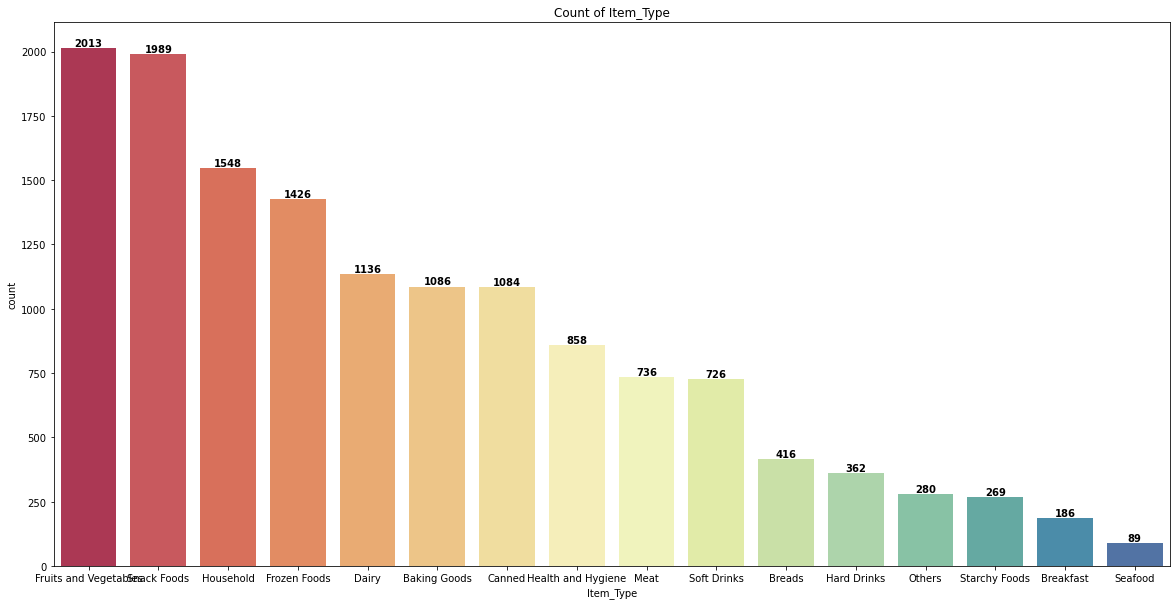

In [29]:
count_plot(sales_df,'Item_Type')

we can see that fruits and vegetables are sold more and sea foods are sold less

##### Outlet type count

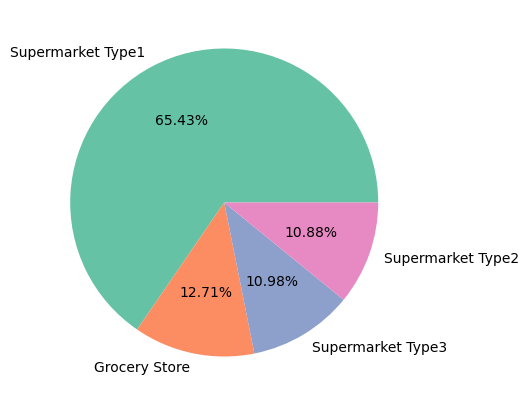

In [30]:
pie(sales_df,'Outlet_Type')

Supermarket Type 1 has more no of stores and Supermarket Type 2 has less no of stores

##### Outlet location type

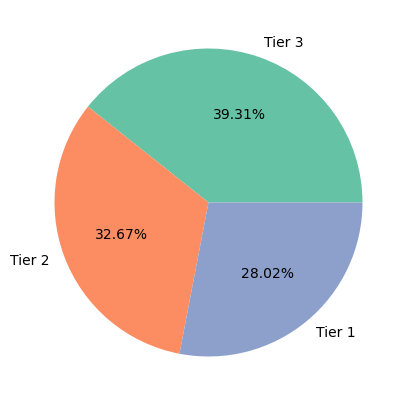

In [31]:
pie(sales_df,'Outlet_Location_Type')

Tier 3 locationd are more and tier 2 locations are less

##### Outlet Size count

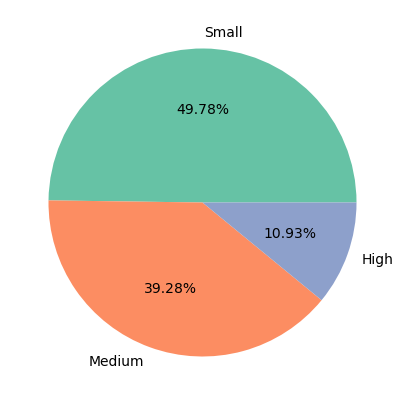

In [32]:
pie(sales_df,'Outlet_Size')

Small sized stores are more and large sized stores are less

##### Item Fat Content count

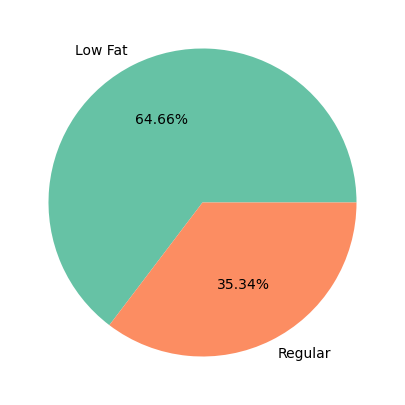

In [33]:
pie(sales_df,'Item_Fat_Content')

Low fat content types of food are in most nos

##### Sales figures visualization

<AxesSubplot:xlabel='Item_Outlet_Sales'>

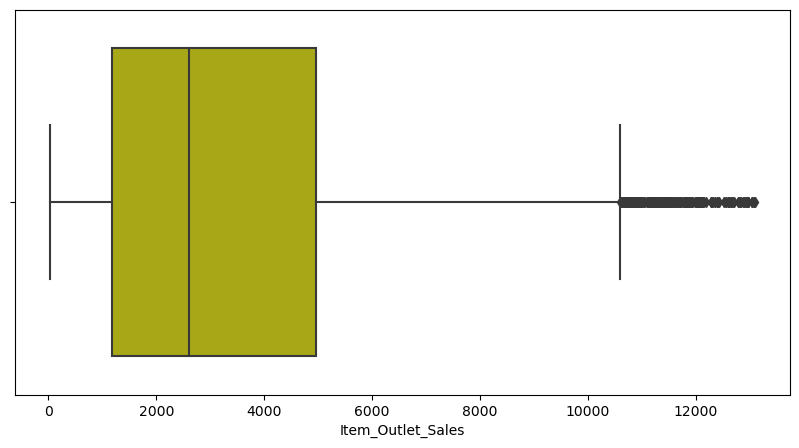

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x = sales_df['Item_Outlet_Sales'],color='y')

we can see that the range of most no of sales is from 1700 to 2200

##### MRP visualization

<AxesSubplot:xlabel='Item_MRP'>

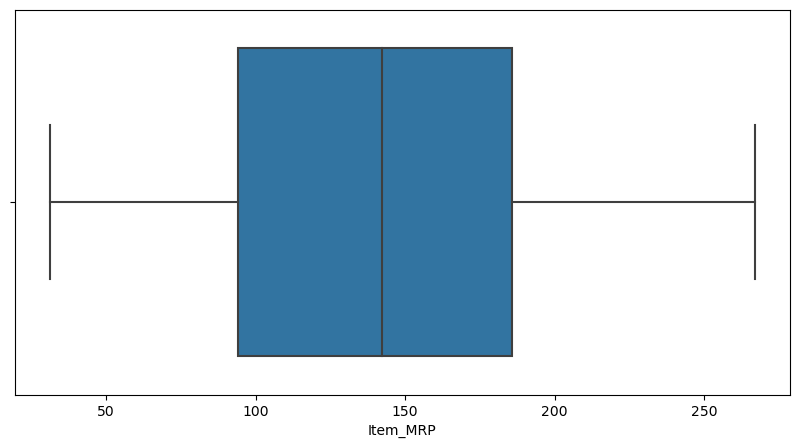

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x = sales_df['Item_MRP'])

Most of the products costs from 100 to 200

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

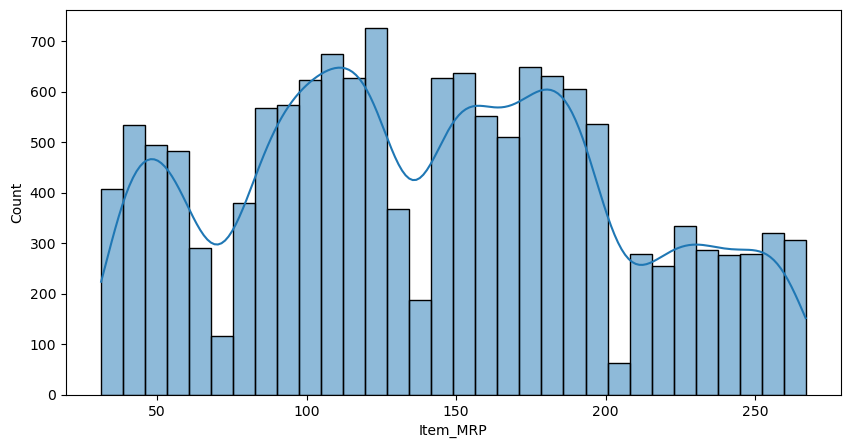

In [36]:
plt.figure(figsize=(10,5))
sns.histplot(x = sales_df['Item_MRP'],kde=True)

##### Outlet_Type vs Item_Outlet_Sales

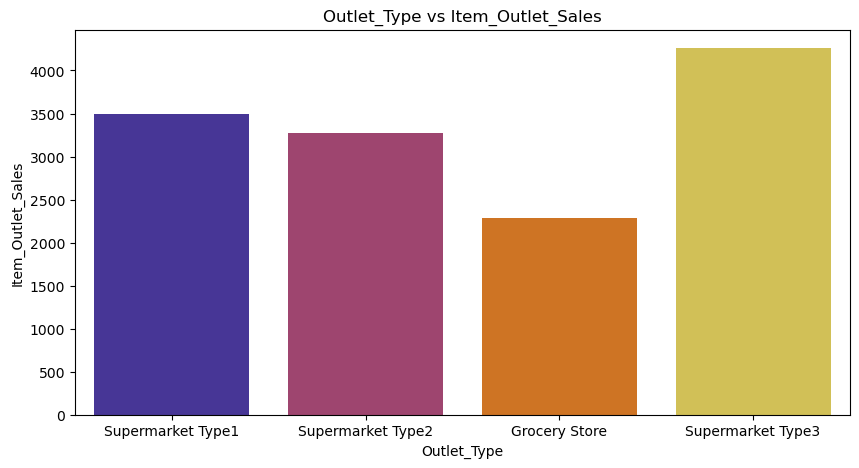

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=sales_df["Outlet_Type"],y=sales_df['Item_Outlet_Sales'],ci=False,palette="CMRmap")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Type vs Item_Outlet_Sales")
plt.show()

supermarket type 3 contibutes more in sales

##### Outlet_Size vs Item_Outlet_Sales

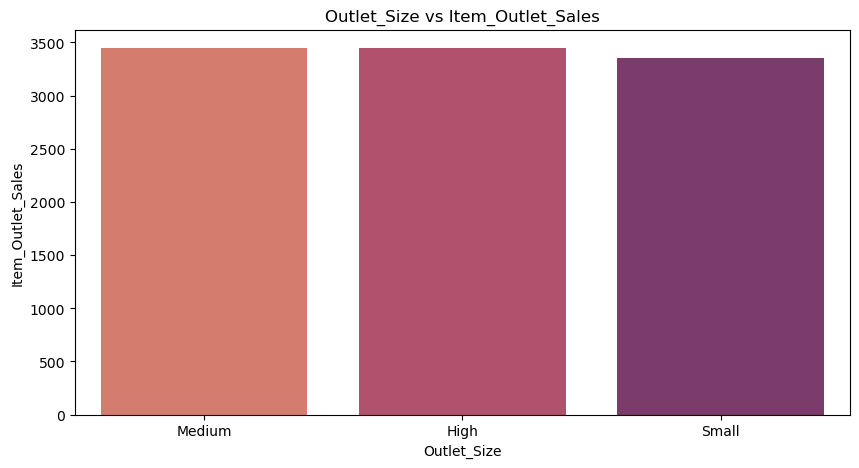

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x=sales_df["Outlet_Size"],y=sales_df['Item_Outlet_Sales'],ci=False,palette="flare")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Size vs Item_Outlet_Sales")
plt.show()

almost all outlet sizes give same amount of revenue around an average of 2000

##### Item_Fat_Content vs Item_Outlet_Sales

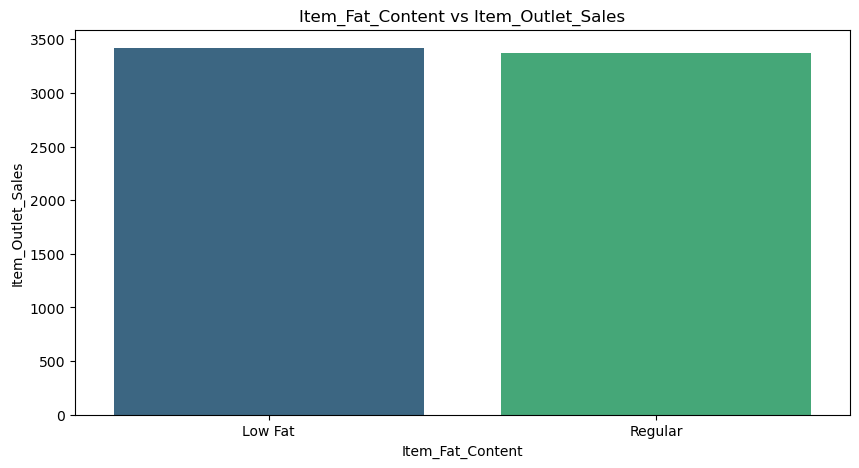

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=sales_df["Item_Fat_Content"],y=sales_df['Item_Outlet_Sales'],ci=False,palette="viridis")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Fat_Content vs Item_Outlet_Sales")
plt.show()

almost both of them generate same amount of revenue around an average of 2000

##### Item_Type vs Item_Outlet_Sales

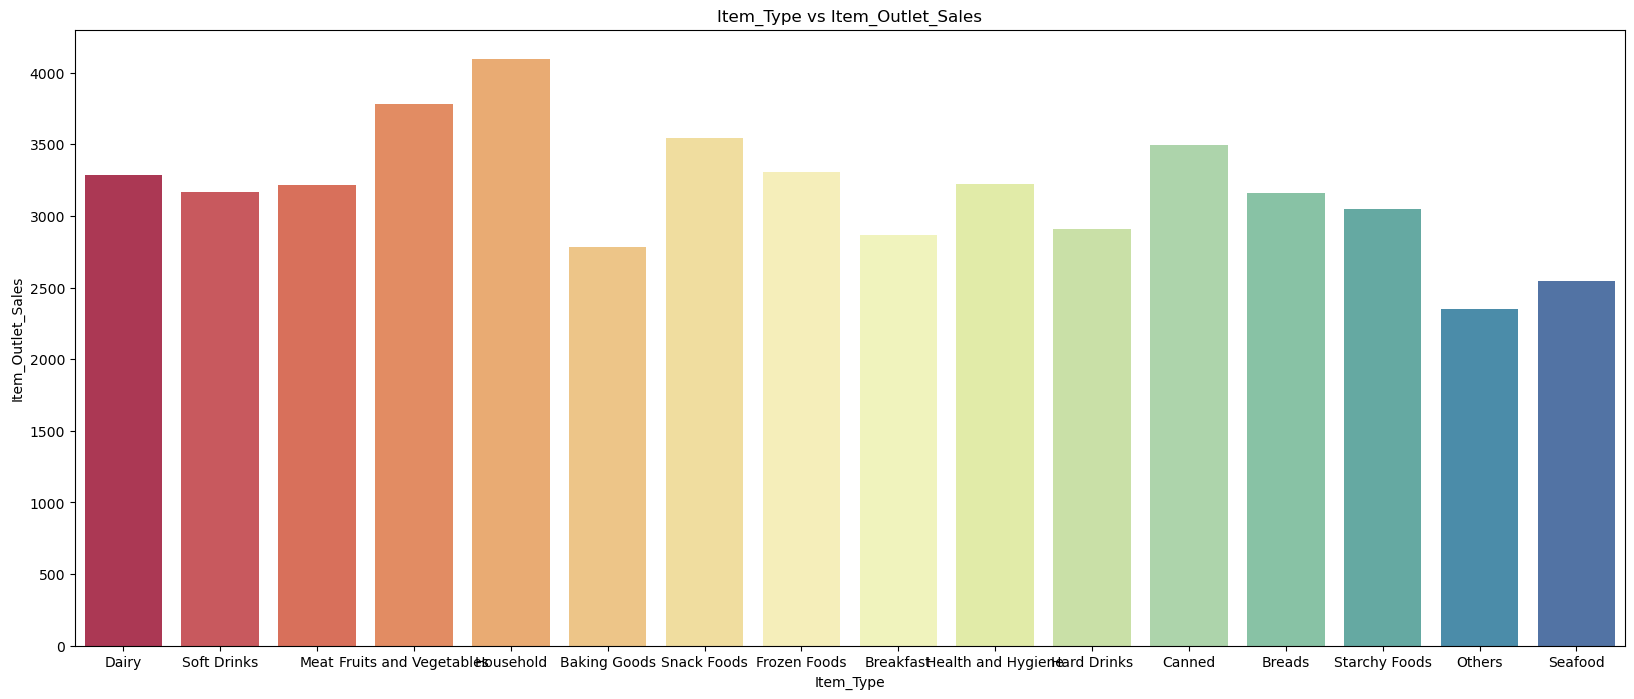

In [40]:
plt.figure(figsize=(20,8))
sns.barplot(x=sales_df["Item_Type"],y=sales_df['Item_Outlet_Sales'],ci=False,palette="Spectral")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Type vs Item_Outlet_Sales")
plt.show()

almost all of them generate same amount of revenue around an average of 2000

##### Outlet_Establishment_Year vs Item_Outlet_Sales

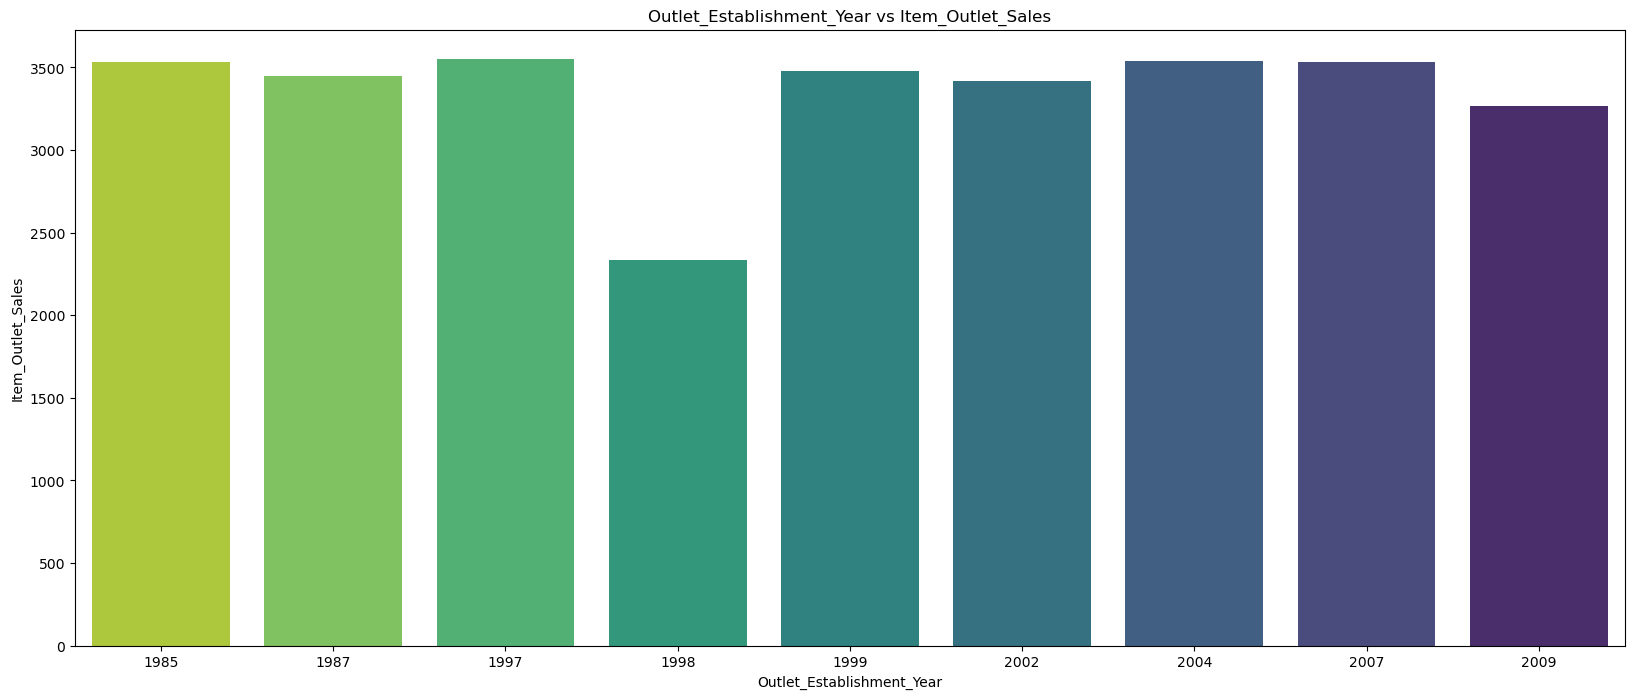

In [41]:
plt.figure(figsize=(20,8))
sns.barplot(x=sales_df["Outlet_Establishment_Year"],y=sales_df['Item_Outlet_Sales'],ci=False,palette="viridis_r")
plt.ylabel("Item_Outlet_Sales")
plt.title("Outlet_Establishment_Year vs Item_Outlet_Sales")
plt.show()

stores established in 1998 generates less income while all others are on the same range

##### Item_MRP vs Item_Outlet_Sales

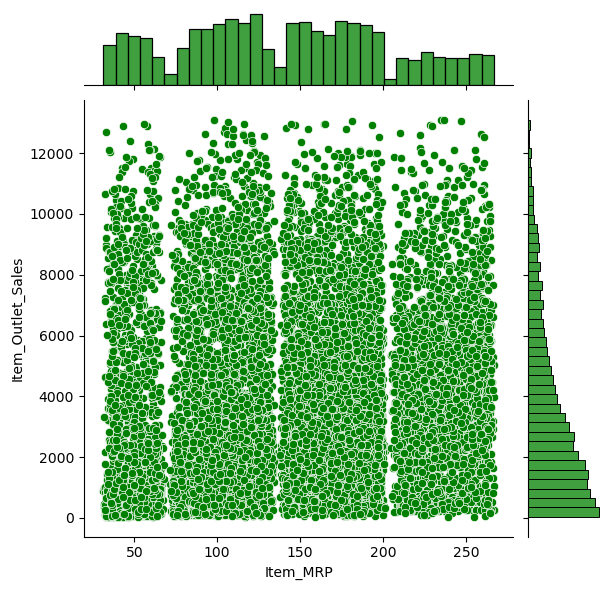

In [42]:
sns.jointplot(data= sales_df, x= 'Item_MRP', y= 'Item_Outlet_Sales',color='green');

Products with more MRP genreates more revenue

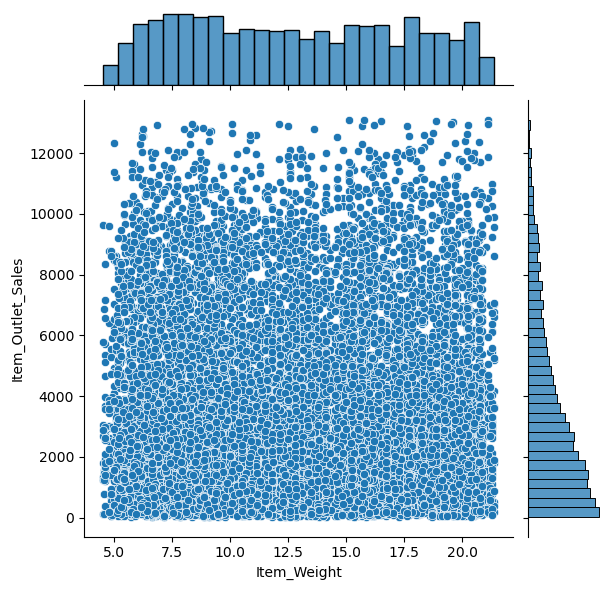

In [43]:
sns.jointplot(data= sales_df, x= 'Item_Weight', y= 'Item_Outlet_Sales');

Item weight doesnt play a role in sales

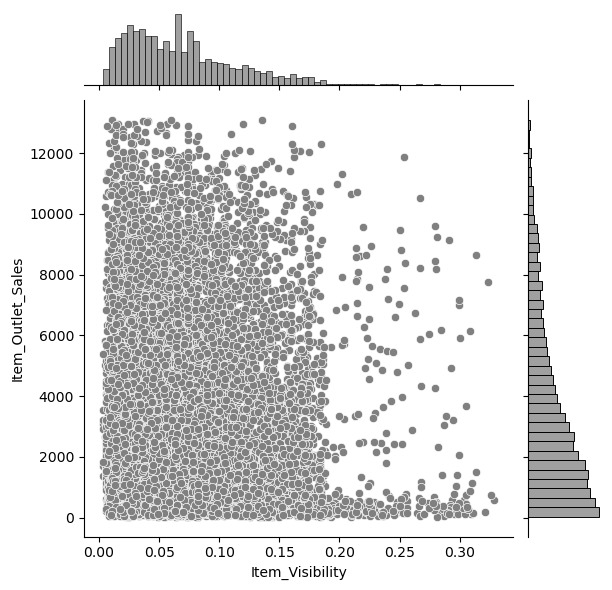

In [44]:
sns.jointplot(data= sales_df, x= 'Item_Visibility', y= 'Item_Outlet_Sales',color='gray');

we can see that products that have visibility index from 0.001 to 0.15 contribute more to sales

##### Outlet_Type wise Item_Fat_Content

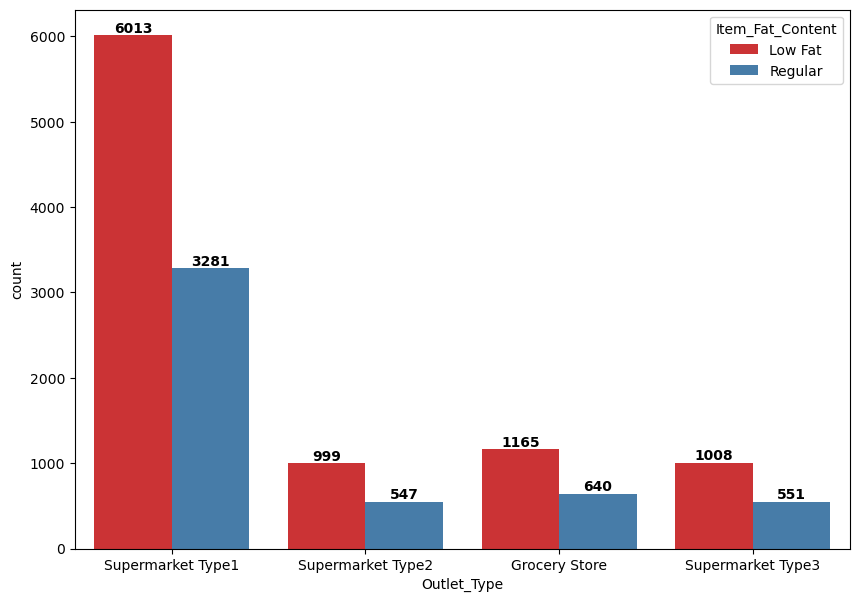

In [45]:
bivariate(sales_df,'Outlet_Type','Item_Fat_Content',1)

supermarket type 1 has more low fat content products

##### Item_Type wise Item_Fat_Content

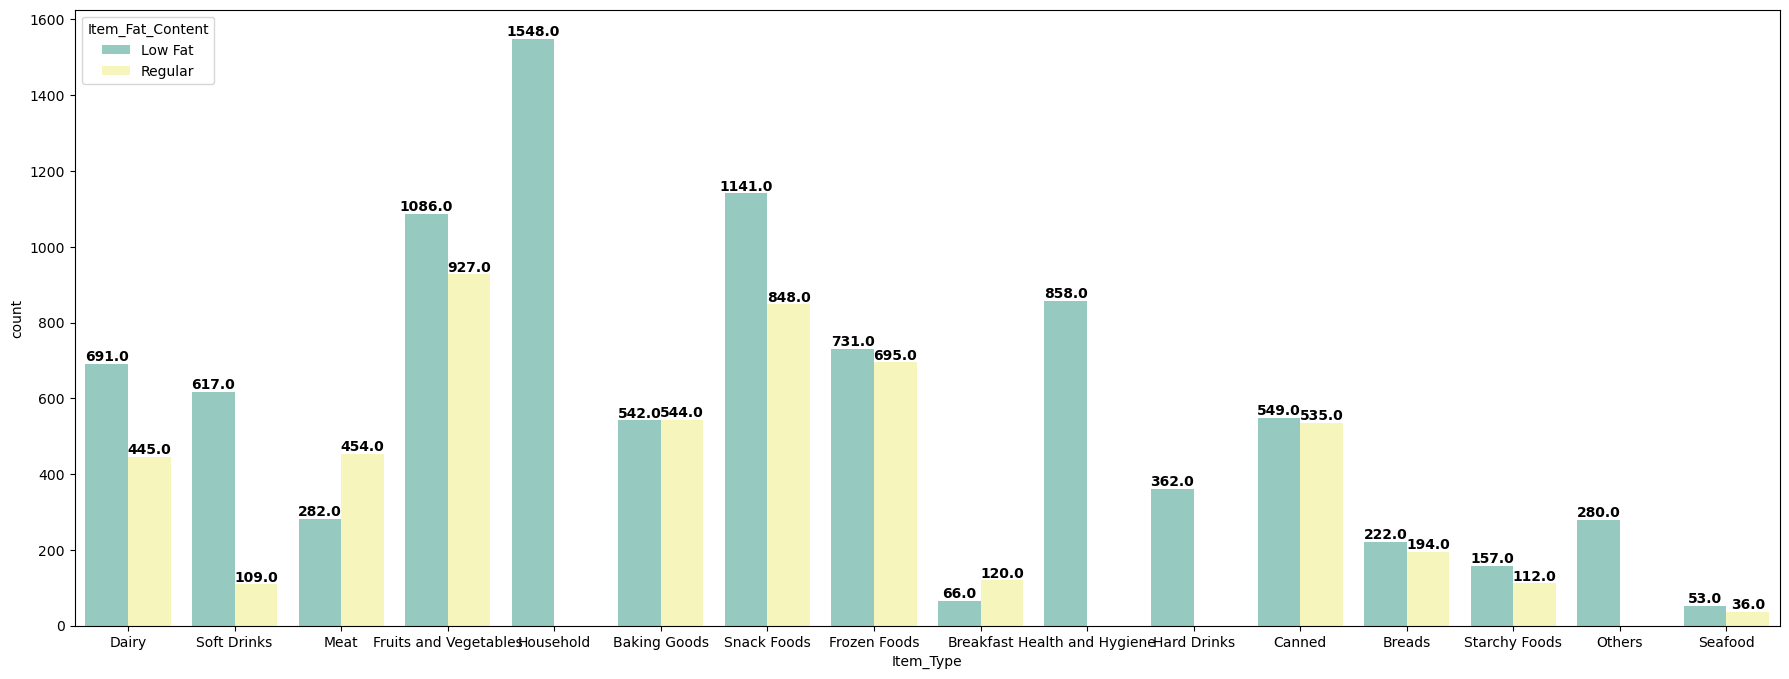

In [46]:
fig, ax = plt.subplots(figsize = (22,8))
sns.countplot(x = 'Item_Type', hue = 'Item_Fat_Content', data = sales_df, palette='Set3')
for p in ax.patches: 
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.annotate(f'{y}',(x,y),weight='bold',va = 'bottom', ha ='center')
plt.show()

baking,frozen and canned products have more low fat content types

##### Outlet_Location_Type wise Outlet_Type

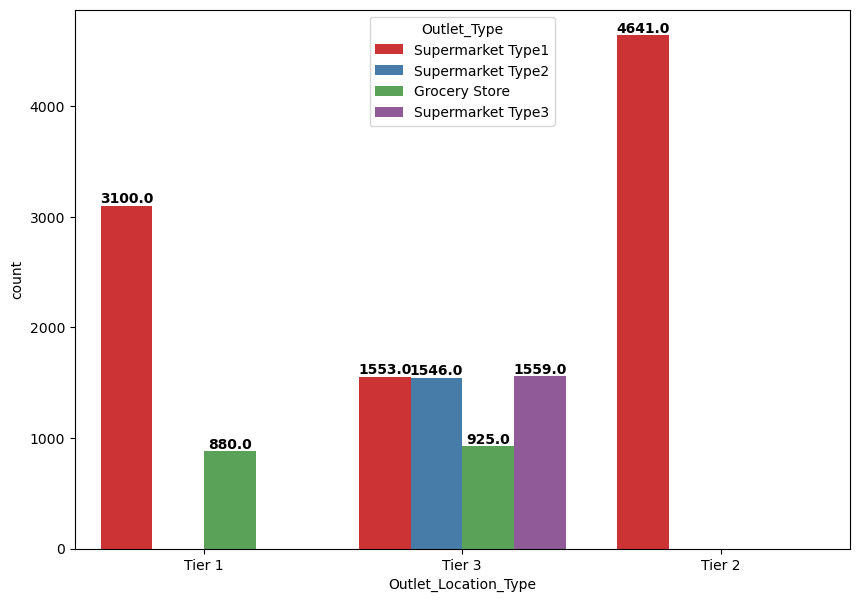

In [47]:
bivariate(sales_df,'Outlet_Location_Type','Outlet_Type',1)

tier 3 location has the most no of stores

#### LABEL ENCODING AND SCALING

In [48]:
# dropping unecessary columns
sales_df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [49]:
sales_df.shape

(14204, 10)

In [50]:
# changing the datatypes
for i in sales_df.columns:
    if sales_df[i].dtypes=="object":
        sales_df[i]=sales_df[i].astype('category')

In [51]:
sales_df.dtypes

Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

In [52]:
#label encoding
label_encoder = preprocessing.LabelEncoder()
for i in sales_df.columns:
    if sales_df[i].dtypes=="category":
        sales_df[i]=label_encoder.fit_transform(sales_df[i])

In [53]:
sales_df.dtypes

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [54]:
# scaling
scale=StandardScaler()
df_scaled=pd.DataFrame(scale.fit_transform(sales_df),columns=sales_df.columns)
df_scaled.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,-0.751014,-0.739212,-1.115880,-0.766467,1.752511,0.139681,-0.575144,-1.369286,-0.252702,0.119018
1,-1.477653,1.352792,-1.049426,1.606957,-1.493696,1.334228,-0.575144,1.091566,1.002766,-1.051458
2,1.011839,-0.739212,-1.101219,0.657587,0.009874,0.139681,-0.575144,-1.369286,-0.252702,-0.463379
3,1.377308,1.352792,0.084363,-0.291782,0.661838,0.020226,-0.575144,1.091566,-1.508171,-0.948710
4,-0.830557,-0.739212,-0.123442,0.420245,-1.403623,-1.293777,-2.055636,1.091566,-0.252702,-0.855432


In [55]:
# correlation chart
df_scaled.corr().style.background_gradient(cmap="gist_gray_r")

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.000247,0.000944,-0.001719,0.001913,0.002814
Item_Fat_Content,-0.033737,1.000000,0.048315,-0.147733,-0.004019,0.000137,-0.000827,0.001373,-0.000228,-0.008101
Item_Visibility,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.090833,0.026808,-0.020550,-0.172744,-0.052737
Item_Type,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.003061,-0.001080,0.002083,0.004305,0.030043
Item_MRP,0.035751,-0.004019,-0.009144,0.043948,1.000000,0.000141,-0.001305,0.000838,0.000136,0.213951
Outlet_Establishment_Year,0.000247,0.000137,-0.090833,0.003061,0.000141,1.000000,0.428387,-0.089328,-0.122519,-0.012313
Outlet_Size,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.428387,1.000000,-0.590677,-0.260496,-0.015178
Outlet_Location_Type,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.089328,-0.590677,1.000000,0.467251,0.027468
Outlet_Type,0.001913,-0.000228,-0.172744,0.004305,0.000136,-0.122519,-0.260496,0.467251,1.000000,0.140953
Item_Outlet_Sales,0.002814,-0.008101,-0.052737,0.030043,0.213951,-0.012313,-0.015178,0.027468,0.140953,1.000000


from the correlation chart we can see that Item_Visibility, Outlet_Type, Item_MRP are affecting the most

#### LINEAR REGRESSION

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

##### Univariate

In [57]:
# splitting
x0=np.array(df_scaled['Item_MRP']).reshape((-1, 1))
y0=np.array(df_scaled['Item_Outlet_Sales'])
x0_train,x0_test,y0_train,y0_test=train_test_split(x0,y0,train_size=0.70,random_state=200)
print("shape of train and test dataset: ",x0_train.shape,x0_test.shape)
print("shape of train and test dataset: ",x0_train.shape,x0_test.shape)

shape of train and test dataset:  (9942, 1) (4262, 1)
shape of train and test dataset:  (9942, 1) (4262, 1)


In [58]:
#model building

lr_u_model = LinearRegression().fit(x0_train, y0_train)
tr_sr = lr_u_model.score(x0_train, y0_train)
ts_sr = lr_u_model.score(x0_test, y0_test)

In [59]:
# test score
print('Test Data score:', ts_sr)

Test Data score: 0.049256534024434306


In [60]:
# train score
print('coefficient of determination:', tr_sr)

coefficient of determination: 0.044057342679861056


In [61]:
print('intercept:', lr_u_model.intercept_)

intercept: 0.009413496716544182


In [62]:
print('slope:', lr_u_model.coef_)

slope: [0.21031785]


In [63]:
# prediction
y0_pred = lr_u_model.predict(x0_test)
print('predicted response:', y0_pred, sep='\n')

predicted response:
[ 0.15729284 -0.26493265  0.1293269  ... -0.03295911  0.39750365
  0.13925797]


In [64]:
# rmse
MSE0=mean_squared_error(y0_test, y0_pred)
MAE0=mean_absolute_error(y0_test,y0_pred)
RMSE0 = mean_squared_error(y0_test, y0_pred, squared=False)

In [65]:
print('MSE {};  MAE {};  RMSE {}'.format(MSE0,MAE0,RMSE0))

MSE 0.9118121004194535;  MAE 0.7530582498304985;  RMSE 0.9548885277452304


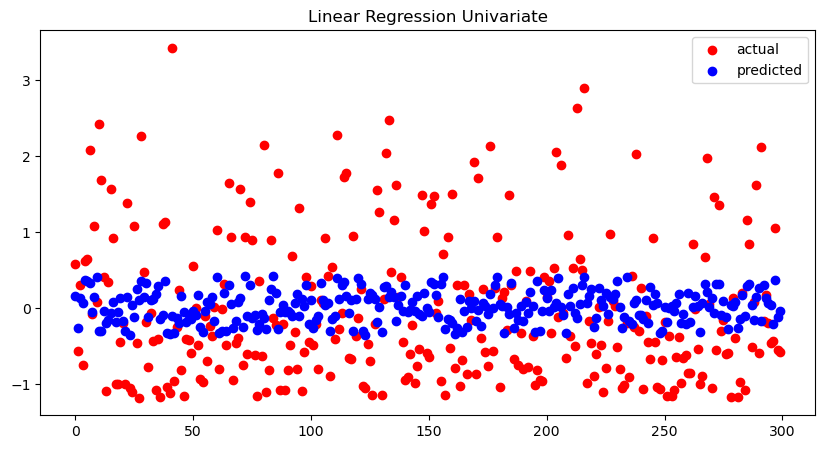

In [66]:
x_ax=list(np.arange(0,len(y0_test[:300])))
plt.figure(figsize=(10,5))
plt.scatter(x_ax,y0_test[:300],color = 'red',label='actual')
plt.scatter(x_ax,y0_pred[:300],color='blue',label='predicted')
plt.title('Linear Regression Univariate')
plt.legend()
plt.show()

In [67]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [68]:
def rmse(scores):
    rmse = np.sqrt(-scores)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [69]:
lr_rg = LinearRegression()
cv=RepeatedKFold(n_splits=5,n_repeats=2)
score_lr=cross_val_score(lr_rg,x0,y0,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')
scores=cross_val_score(lr_rg,x0,y0,cv=cv,n_jobs=-1, error_score='raise',scoring='neg_mean_squared_error')
print("Mean R2: ",score_lr.mean())
rmse(scores.mean())

Mean R2:  0.04495207011102489
rmse= 0.98


##### Multivariate

In [70]:
#splitting the data

x1=df_scaled[['Item_Visibility', 'Outlet_Type', 'Item_MRP','Outlet_Location_Type']]
y1=df_scaled['Item_Outlet_Sales']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,train_size=0.80,random_state=200)
print("shape of train and test dataset: ",x1_train.shape,x1_test.shape)
print("shape of train and test dataset: ",x1_train.shape,x1_test.shape)

shape of train and test dataset:  (11363, 4) (2841, 4)
shape of train and test dataset:  (11363, 4) (2841, 4)


In [71]:
#model building

lr_model = LinearRegression().fit(x1_train, y1_train)
tr_sr = lr_model.score(x1_train, y1_train)
ts_sr = lr_model.score(x1_test, y1_test)

In [72]:
# test score
print('Test Data score:', ts_sr)

Test Data score: 0.06609870102369031


In [73]:
# train score
print('coefficient of determination:', tr_sr)

coefficient of determination: 0.0684886015197419


In [74]:
print('intercept:', lr_model.intercept_)

intercept: 0.00014277426287492763


In [75]:
print('slope:', lr_model.coef_)

slope: [-0.02501962  0.16489154  0.20929182 -0.04389719]


In [76]:
# prediction
y1_pred = lr_model.predict(x1_test)
print('predicted response:', y1_pred, sep='\n')

predicted response:
[ 0.19081504 -0.49990546  0.10839398 ...  0.06873718 -0.70197882
 -0.05114616]


In [77]:
# rmse
MSE1=mean_squared_error(y1_test, y1_pred)
MAE1=mean_absolute_error(y1_test,y1_pred)
RMSE1 = mean_squared_error(y1_test, y1_pred, squared=False)

In [78]:
print('MSE {};  MAE {};  RMSE {}'.format(MSE1,MAE1,RMSE1))

MSE 0.9218201316151972;  MAE 0.7491402040583853;  RMSE 0.9601146450373503


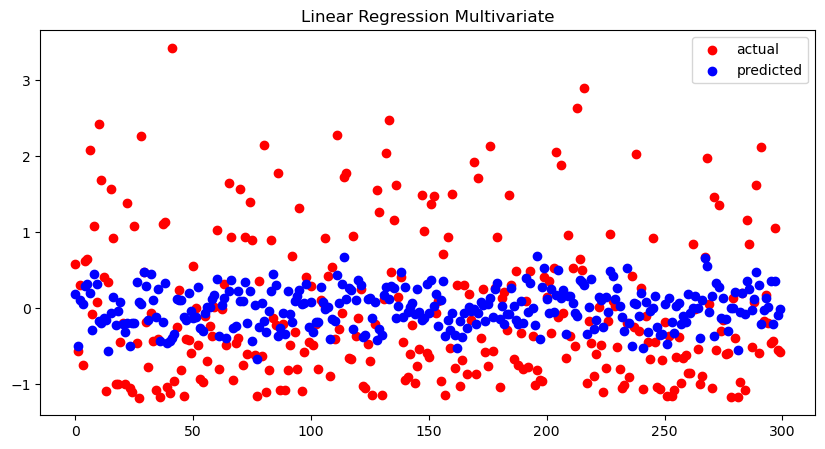

In [79]:
x_ax=list(np.arange(0,len(y1_test[:300])))
plt.figure(figsize=(10,5))
plt.scatter(x_ax,y1_test[:300],color = 'red',label='actual')
plt.scatter(x_ax,y1_pred[:300],color='blue',label='predicted')
plt.legend()
plt.title('Linear Regression Multivariate')
plt.show()

In [80]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from numpy import sqrt

##### Cross validation using KFold

In [81]:
lr_rg = LinearRegression()
cv=RepeatedKFold(n_splits=5,n_repeats=2)
score_mlr=cross_val_score(lr_rg,x1,y1,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')
scores=cross_val_score(lr_rg,x1,y1,cv=cv,n_jobs=-1, error_score='raise',scoring='neg_mean_squared_error')
print("Mean R2: ",score_mlr.mean())
rmse(scores.mean())

Mean R2:  0.06729307046442003
rmse= 0.97


#### DECISSION TREE REGRESSOR

In [82]:
X = df_scaled

In [83]:
x = X.drop(columns=['Item_Outlet_Sales'],axis=1)
y = df_scaled['Item_Outlet_Sales']

In [84]:
#splitting the data
x2=x
y2=y
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,train_size=0.70)
print("shape of the train and test datasets: ",x2_train.shape,x2_test.shape)

shape of the train and test datasets:  (9942, 9) (4262, 9)


In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
#model building
dtm1 = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm1.fit(x2_train,y2_train)
print("R-Squared on train dataset= {}".format(dtm1.score(x2_train,y2_train)))

dtm1.fit(x2_test,y2_test)   
print("R-Squaredon test dataset= {}".format(dtm1.score(x2_test,y2_test)))

R-Squared on train dataset= 0.08038346131491347
R-Squaredon test dataset= 0.09777131956872365


In [87]:
# prediction

y_pred2=dtm1.predict(x2_test)
y_pred2

array([-0.42654955,  0.39720704,  0.09231975, ...,  0.09231975,
        0.09231975, -0.19880803])

In [88]:
#rmse

MSE2 = mean_squared_error(y2_test,y_pred2,squared=True)
RMSE2 = mean_squared_error(y2_test,y_pred2,squared=False)

In [89]:
print("MSE: ",MSE2)
print("RMSE: ",RMSE2)

MSE:  0.9231387308981712
RMSE:  0.9608010881020957


In [90]:
from sklearn import tree

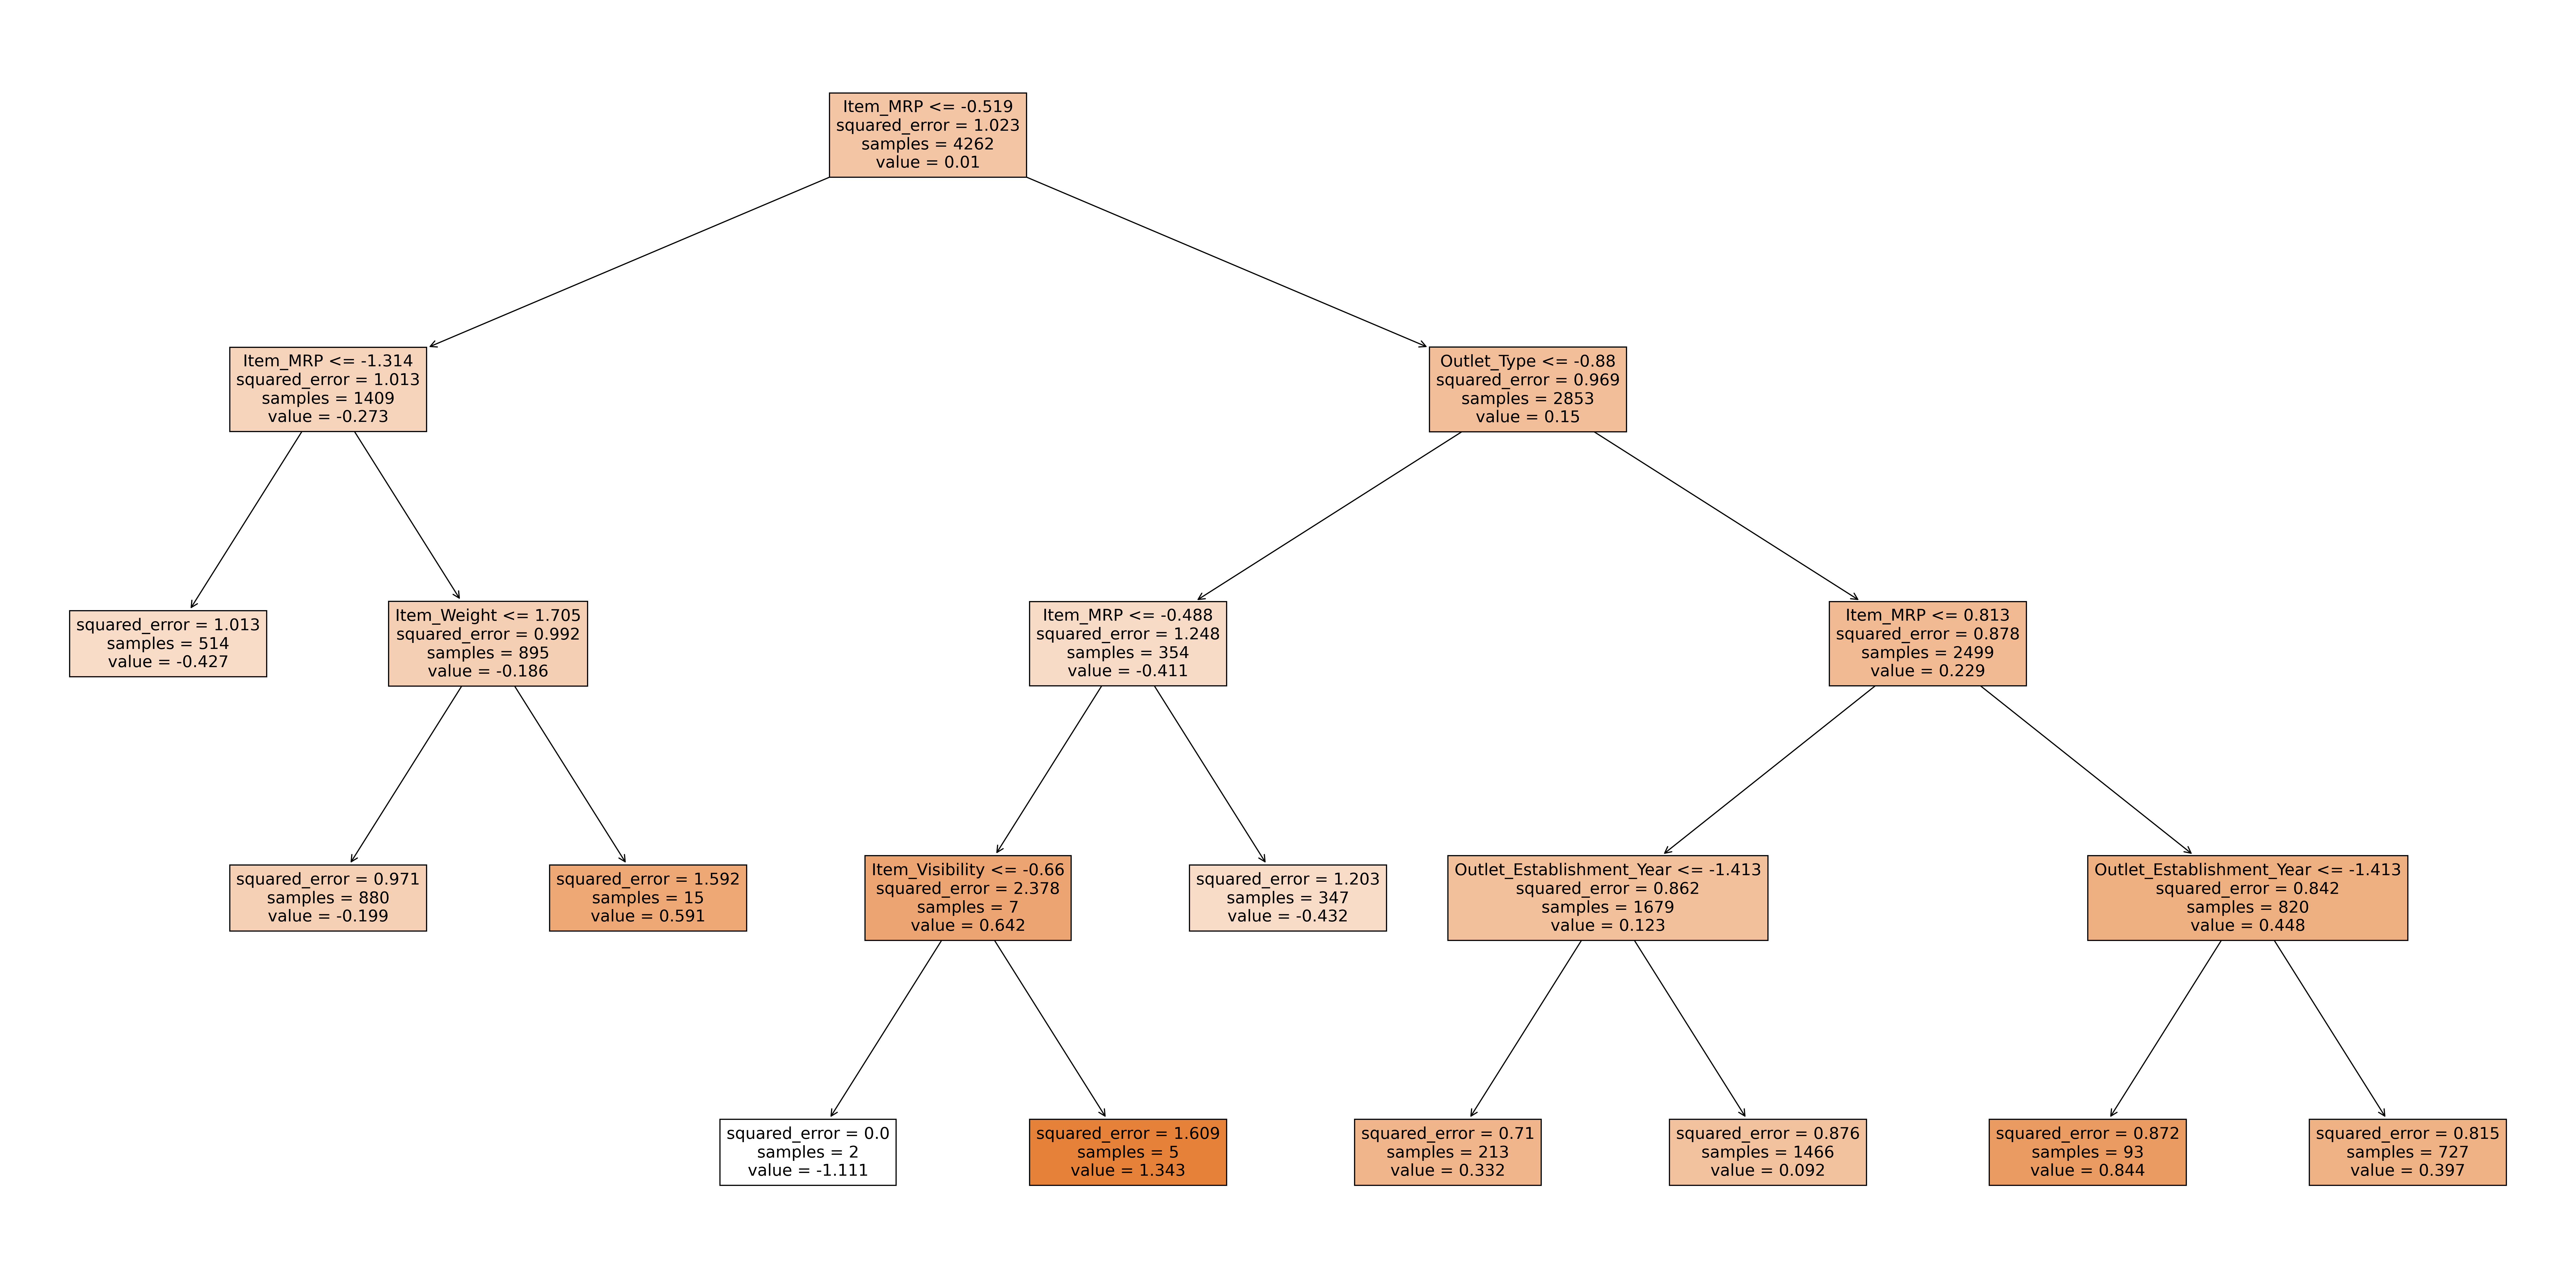

In [91]:
#plotting tree

fig,ax=plt.subplots(1,1,figsize=(40,20),dpi=300)
tree.plot_tree(dtm1,feature_names=x2_train.columns,filled=True)
plt.show()

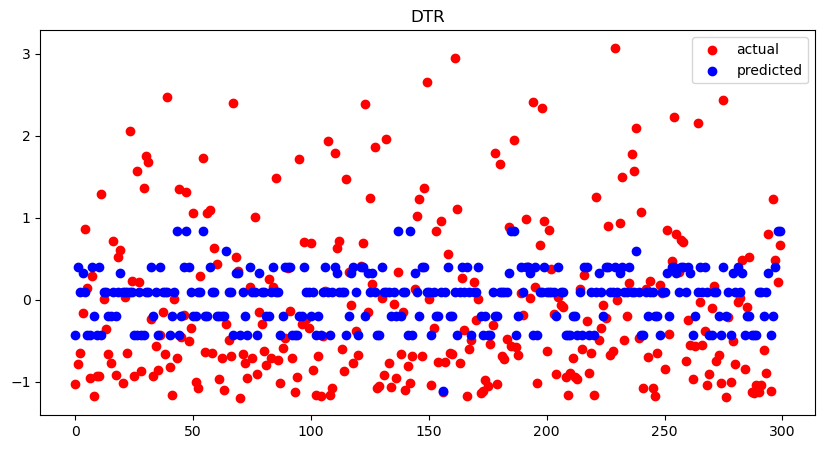

In [92]:
plt.figure(figsize=(10,5))
x_ax=list(np.arange(0,len(y2_test[:300])))
plt.scatter(x_ax,y2_test[:300],color = 'red',label='actual')
plt.scatter(x_ax,y_pred2[:300],color='blue',label='predicted')
plt.legend()
plt.title('DTR')
plt.show()

##### Cross validation using Kfold

In [93]:
kf = KFold(n_splits=3, shuffle=False, random_state=None)
xk2=x2

for xk2_train, xk2_test in kf.split(xk2):
    print("Train data",xk2_train,"Test data",xk2_test)

Train data [ 4735  4736  4737 ... 14201 14202 14203] Test data [   0    1    2 ... 4732 4733 4734]
Train data [    0     1     2 ... 14201 14202 14203] Test data [4735 4736 4737 ... 9467 9468 9469]
Train data [   0    1    2 ... 9467 9468 9469] Test data [ 9470  9471  9472 ... 14201 14202 14203]


In [94]:
yk2=y2
for yk2_train, yk2_test in kf.split(yk2):
    print("Train data",yk2_train,"Test data",yk2_test)

Train data [ 4735  4736  4737 ... 14201 14202 14203] Test data [   0    1    2 ... 4732 4733 4734]
Train data [    0     1     2 ... 14201 14202 14203] Test data [4735 4736 4737 ... 9467 9468 9469]
Train data [   0    1    2 ... 9467 9468 9469] Test data [ 9470  9471  9472 ... 14201 14202 14203]


In [95]:
dtm = DecisionTreeRegressor(max_depth= 4, random_state= 32)
cv=RepeatedKFold(n_splits=5,n_repeats=2)
score_dtm=cross_val_score(dtm,x2,y2,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')
print("Mean R2: ",score_dtm.mean())

Mean R2:  0.06609740267287575


In [96]:
score4 = cross_val_score(tree.DecisionTreeRegressor(max_depth= 4, random_state= 32), xk2, yk2,cv=kf,scoring="neg_mean_squared_error")
print("Mean RMSE: ",(round(sqrt(-score4.mean()),3)))

Mean RMSE:  1.124


In [97]:
def rmse(score5):
    rmse = np.sqrt(-score5)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [98]:
# varying depth

kf = KFold(n_splits=3, shuffle=False, random_state=None)
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for val in max_depth:
    score5 = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), xk2, yk2, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score5.mean())

For max depth: 1
rmse= 1.13
For max depth: 2
rmse= 1.12
For max depth: 3
rmse= 1.12
For max depth: 4
rmse= 1.12
For max depth: 5
rmse= 1.13
For max depth: 6
rmse= 1.14
For max depth: 7
rmse= 1.14
For max depth: 8
rmse= 1.15
For max depth: 9
rmse= 1.17
For max depth: 10
rmse= 1.19
For max depth: 11
rmse= 1.22
For max depth: 12
rmse= 1.24
For max depth: 13
rmse= 1.26
For max depth: 14
rmse= 1.29
For max depth: 15
rmse= 1.31


#### RANDOM FOREST REGRESSOR

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [100]:
#splitting the data

x3=x
y3=y
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,train_size=0.70)
print("shape of the train and test datasets: ",x3_train.shape,x3_test.shape)

shape of the train and test datasets:  (9942, 9) (4262, 9)


In [101]:
reg_rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
reg_rf.fit(x3_train, y3_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [102]:
reg_rf.score(x3_train, y3_train)

0.11248399237281659

In [103]:
reg_rf.score(x3_test, y3_test)

0.08019395344271263

In [104]:
ypred03= reg_rf.predict(x3_test)

In [105]:
reg_rf.oob_score_

0.07735006557276602

In [106]:
RMSE03=mean_squared_error(y3_test,ypred03,squared=False)
MSE03=mean_squared_error(y3_test,ypred03)
print("RMSE: ",RMSE03)
print("MSE: ",MSE03)

RMSE:  0.9641011347559427
MSE:  0.9294909980376964


In [107]:
reg_rf = RandomForestRegressor()
cv=RepeatedKFold(n_splits=5,n_repeats=2)
score_rf=cross_val_score(reg_rf,x3,y3,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')
scores=cross_val_score(reg_rf,x3,y3,cv=cv,n_jobs=-1, error_score='raise',scoring='neg_mean_squared_error')
print("Mean R2: ",score_rf.mean())
rmse(scores.mean())

Mean R2:  -0.03642586985186187
rmse= 1.02


In [108]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10,25,30,50,100]
}

In [109]:
grid = GridSearchCV(estimator=rf,param_grid=params,cv = 4,n_jobs=-1,scoring="accuracy")
grid.fit(x3_train,y3_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='accuracy')

In [110]:
rf_best = grid.best_estimator_
rf_best

RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,
                      n_jobs=-1, random_state=42)

In [111]:
best_model=RandomForestRegressor(n_jobs=-1,max_depth=2,min_samples_leaf=5,n_estimators=10,random_state=42).fit(x3_train,y3_train)

In [112]:
ypred3= best_model.predict(x3_test)
ypred3

array([-0.15571145, -0.30400498,  0.21552002, ..., -0.27926091,
       -0.32679822, -0.39024986])

In [113]:
train_sc = best_model.score(x3_train,y3_train)
print("accuracy of model on training dataset: ",train_sc)

accuracy of model on training dataset:  0.0660754145609439


In [114]:
test_sc = best_model.score(x3_test,y3_test)
print("accuracy of model on training dataset: ",test_sc)

accuracy of model on training dataset:  0.06364989974031576


In [115]:
RMSE3=mean_squared_error(y3_test,ypred3,squared=False)
MSE3=mean_squared_error(y3_test,ypred3)
print("RMSE: ",RMSE3)
print("MSE: ",MSE3)

RMSE:  0.972732876858992
MSE:  0.9462092497223709


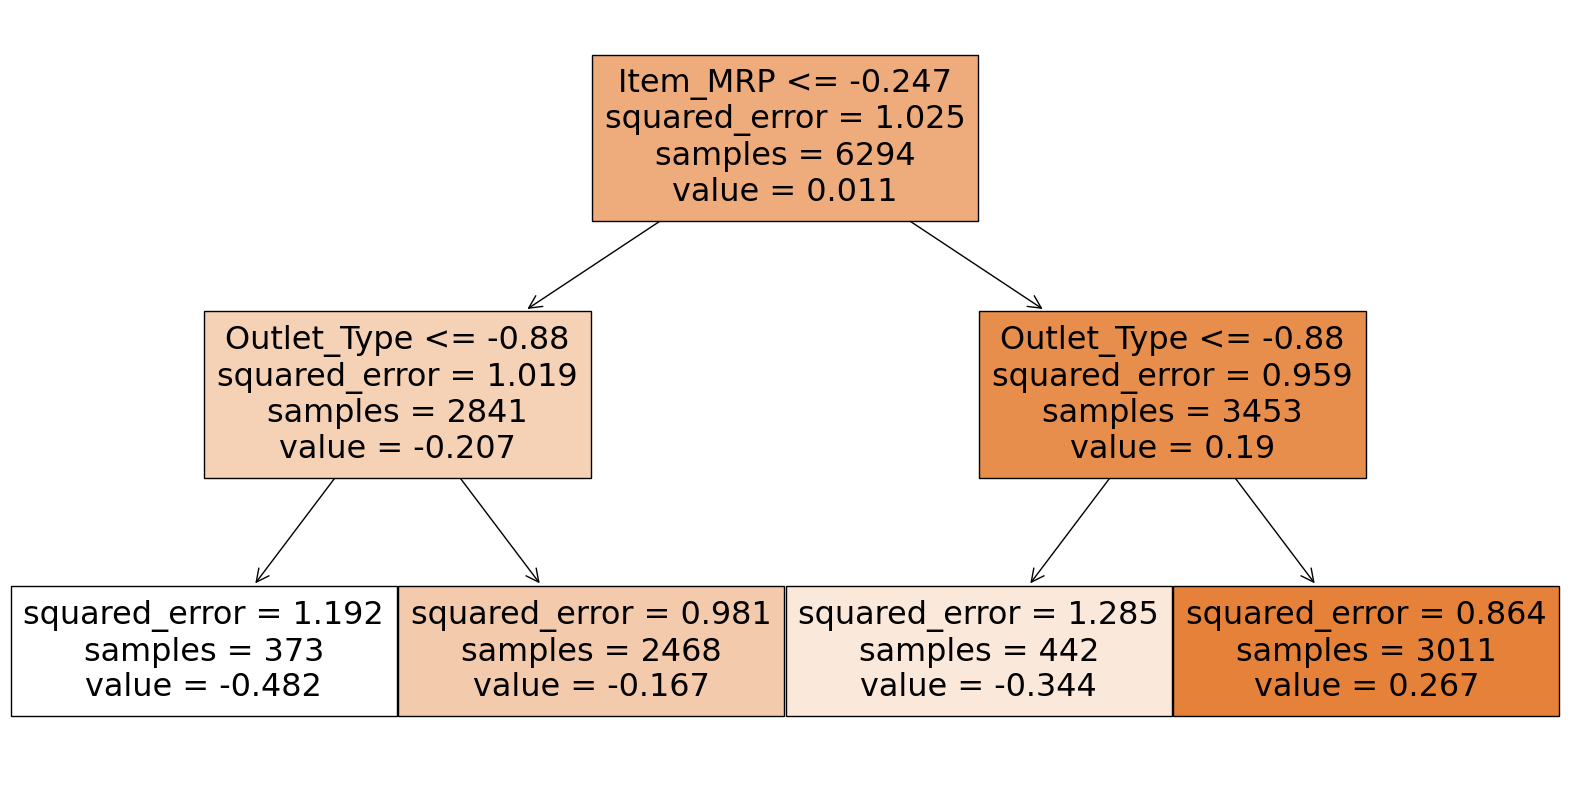

In [116]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_best.estimators_[5], feature_names = x3_train.columns,filled=True);

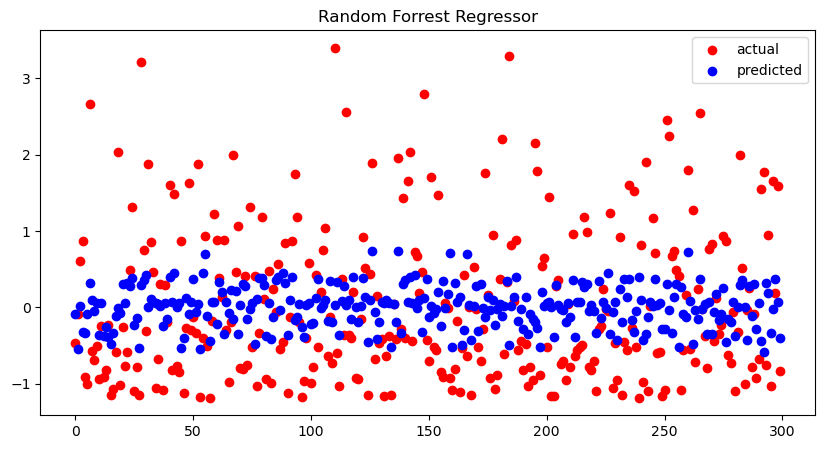

In [117]:
plt.figure(figsize=(10,5))
x_ax=list(np.arange(0,len(y3_test[:300])))
plt.scatter(x_ax,y3_test[:300],color = 'red',label='actual')
plt.scatter(x_ax,ypred03[:300],color='blue',label='predicted')
plt.legend()
plt.title('Random Forrest Regressor')
plt.show()

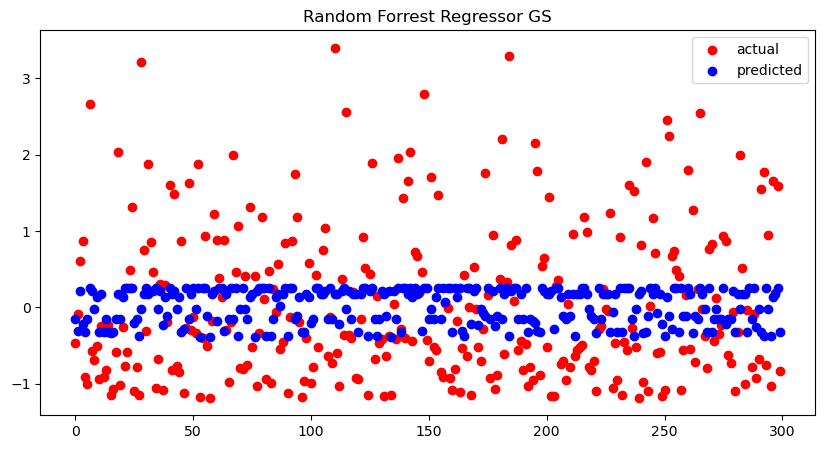

In [118]:
plt.figure(figsize=(10,5))
x_ax=list(np.arange(0,len(y3_test[:300])))
plt.scatter(x_ax,y3_test[:300],color = 'red',label='actual')
plt.scatter(x_ax,ypred3[:300],color='blue',label='predicted')
plt.legend()
plt.title('Random Forrest Regressor GS')
plt.show()

#### BOOSTING

In [119]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedKFold

In [120]:
x = X.drop(columns=['Item_Outlet_Sales'],axis=1)
y = df_scaled['Item_Outlet_Sales']

In [121]:
#splitting the data

x4=x
y4=y
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,train_size=0.70)
print("shape of the train and test datasets: ",x4_train.shape,x4_test.shape)

shape of the train and test datasets:  (9942, 9) (4262, 9)


In [122]:
def rmse(scores):
    rmse = np.sqrt(-scores)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [123]:
model_boost=AdaBoostRegressor()
model_boost.fit(x4_train,y4_train)

AdaBoostRegressor()

In [124]:
model_boost.score(x4_train, y4_train)

0.05010576692272273

In [125]:
model_boost.score(x4_test, y4_test)

0.05306461249124117

In [126]:
y_pred4 = model_boost.predict(x4_test)
y_pred4

array([ 0.37575083,  0.25120273,  0.12505168, ..., -0.02997927,
        0.29878515,  0.02994311])

In [127]:
RMSE4=mean_squared_error(y4_test,y_pred4,squared=False)
MSE4=mean_squared_error(y4_test,y_pred4)
print("RMSE: ",RMSE4)
print("MSE: ",MSE4)

RMSE:  0.9654524320251009
MSE:  0.932098398503182


In [128]:
ad_model=AdaBoostRegressor()
cv=RepeatedKFold(n_splits=5,n_repeats=2)
score_ad=cross_val_score(ad_model,x4,y4,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')
scores=cross_val_score(ad_model,x4,y4,cv=cv,n_jobs=-1, error_score='raise',scoring='neg_mean_squared_error')
print("Mean R2: ",score_ad.mean())
rmse(scores.mean())

Mean R2:  0.039952658809523624
rmse= 0.98


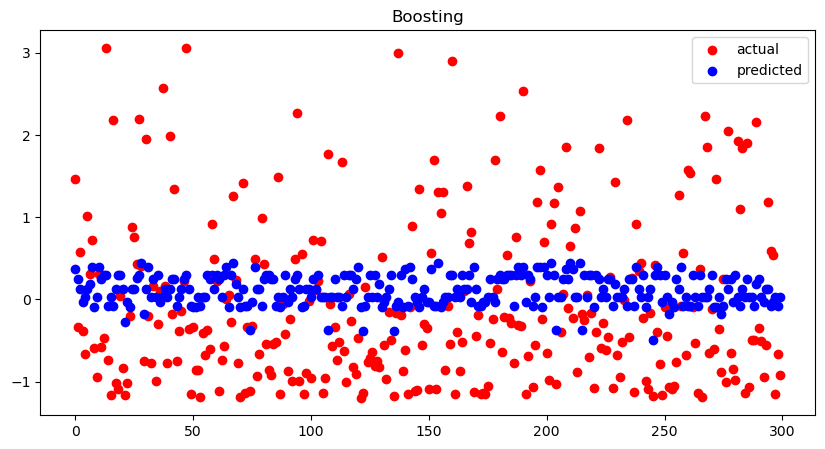

In [129]:
x_ax=list(np.arange(0,len(y4_test[:300])))
plt.figure(figsize=(10,5))
plt.scatter(x_ax,y4_test[:300],color = 'red',label='actual')
plt.scatter(x_ax,y_pred4[:300],color='blue',label='predicted')
plt.title('Boosting')
plt.legend()
plt.show()

#### STACKING

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [131]:
def stacking():
    level0=[]
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level1=LinearRegression()
    model = StackingRegressor(estimators=level0, final_estimator= level1, cv=5)
    return model

In [132]:
model_stack=stacking()
model_stack.fit(x4_train,y4_train)

StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [133]:
model_stack.score(x4_train, y4_train)

0.08531576882284986

In [134]:
model_stack.score(x4_test, y4_test)

0.08834500946208246

In [135]:
y_pred5 = model_stack.predict(x4_test)
y_pred5

array([ 0.32750204,  0.29819277,  0.43046046, ..., -0.33218678,
       -0.0182504 , -0.10460643])

In [136]:
RMSE5=mean_squared_error(y4_test,y_pred5,squared=False)
MSE5=mean_squared_error(y4_test,y_pred5)
print("RMSE: ",RMSE5)
print("MSE: ",MSE5)

RMSE:  0.9472965691347875
MSE:  0.8973707898945392


In [137]:
model=stacking()
cv=RepeatedKFold(n_splits=5,n_repeats=2)
score_stacked=cross_val_score(model,x4,y4,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')
scores=cross_val_score(model,x4,y4,cv=cv,n_jobs=-1, error_score='raise',scoring='neg_mean_squared_error')
print("Mean R2: ",score_stacked.mean())
rmse(scores.mean())

Mean R2:  0.04807780123972164
rmse= 0.98


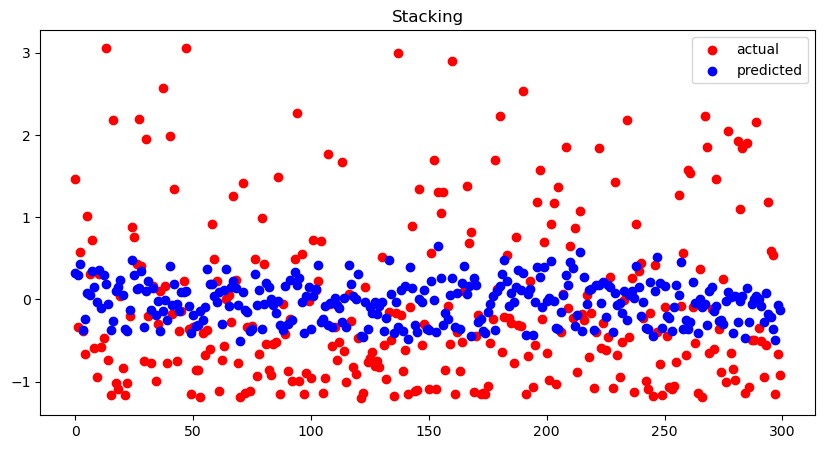

In [138]:
x_ax=list(np.arange(0,len(y4_test[:300])))
plt.figure(figsize=(10,5))
plt.scatter(x_ax,y4_test[:300],color = 'red',label='actual')
plt.scatter(x_ax,y_pred5[:300],color='blue',label='predicted')
plt.title('Stacking')
plt.legend()
plt.show()

#### KNN

In [139]:
from sklearn import datasets, neighbors

In [140]:
x6=x
y6=y

In [141]:
x6_train,x6_test,y6_train,y6_test = train_test_split(x6,y6, train_size=0.8,random_state=42)
print('Shape of the train and test dataset: ', x6_train.shape,x6_test.shape)
print('Shape of  the train and test dataset: ', y6_train.shape,y6_test.shape)

Shape of the train and test dataset:  (11363, 9) (2841, 9)
Shape of  the train and test dataset:  (11363,) (2841,)


Minimum error:- 0.9975360788454769 at K = 1


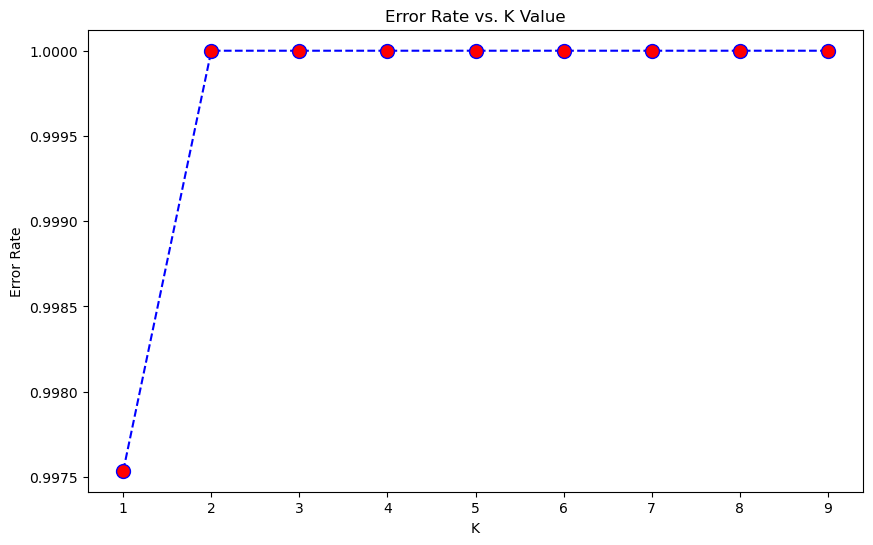

In [142]:
error_rate = []
for i in range(1,10):
    model = neighbors.KNeighborsRegressor(n_neighbors=i)
    model.fit(x6_train,y6_train)
    y_pred = model.predict(x6_test)
    error_rate.append(np.mean(y_pred != y6_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [143]:
k = 4
knn = neighbors.KNeighborsRegressor(k)
knn.fit(x6_train,y6_train)

KNeighborsRegressor(n_neighbors=4)

In [144]:
y_pred6 = knn.predict(x6_test)
y_pred6

array([ 0.13788988,  0.28730621,  1.79896667, ..., -1.14734023,
        0.39627108, -0.69954204])

In [145]:
print("train dataset performance",knn.score(x6_train,y6_train))

train dataset performance 0.3208956075613463


In [146]:
print("test dataset performance",knn.score(x6_test,y6_test))

test dataset performance -0.18624088298796515


In [147]:
RMSE6=mean_squared_error(y6_test,y_pred6,squared=False)
MSE6=mean_squared_error(y6_test,y_pred6)
print("RMSE: ",RMSE6)
print("MSE: ",MSE6)

RMSE:  1.0903643633722964
MSE:  1.188894444912273


In [148]:
k = 4
knn = neighbors.KNeighborsRegressor(k)
cv=RepeatedKFold(n_splits=5,n_repeats=2)
score_knn=cross_val_score(knn,x6,y6,cv=cv,n_jobs=-1, error_score='raise',scoring='r2')
scores=cross_val_score(knn,x6,y6,cv=cv,n_jobs=-1, error_score='raise',scoring='neg_mean_squared_error')
print("Mean R2: ",score_knn.mean())
rmse(scores.mean())

Mean R2:  -0.14252005456882577
rmse= 1.07


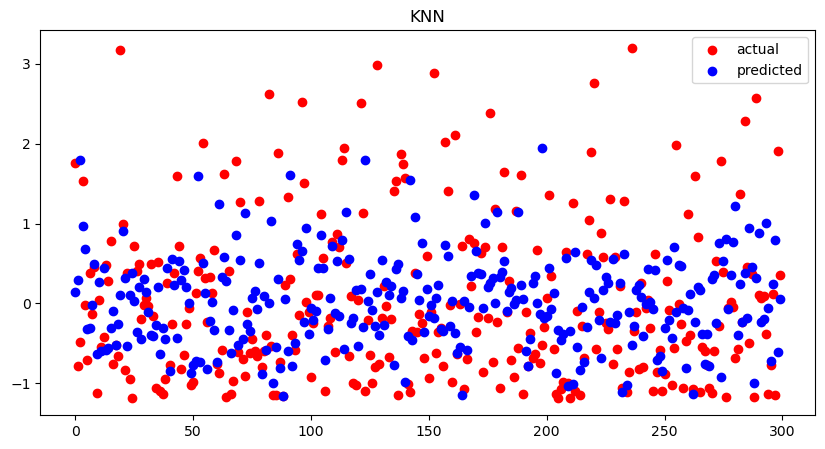

In [149]:
x_ax=list(np.arange(0,len(y6_test[:300])))
plt.figure(figsize=(10,5))
plt.scatter(x_ax,y6_test[:300],color = 'red',label='actual')
plt.scatter(x_ax,y_pred6[:300],color='blue',label='predicted')
plt.title('KNN')
plt.legend()
plt.show()